<a href="https://colab.research.google.com/github/freedom-780/Weather_trends/blob/main/Weather_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ingest 

import csv files from Github repository 

In [11]:
import pandas as pd
city_weather = "https://raw.githubusercontent.com/freedom-780/Weather_trends/b4066594b64afa00050fffdfc4995868d2f36ed1/city_data.csv"
city_weather = pd.read_csv(city_weather)
city_weather.head()

,city,country,avg_temp,year
0,Abidjan,Côte D'Ivoire,25.58,1849
1,Abidjan,Côte D'Ivoire,25.52,1850
2,Abidjan,Côte D'Ivoire,25.67,1851
3,Abidjan,Côte D'Ivoire,NaN,1852
4,Abidjan,Côte D'Ivoire,NaN,1853


In [12]:
 chicago_weather = city_weather[city_weather["city"] == "Chicago"]
chicago_weather.head()

,city,country,avg_temp,year
15107,Chicago,United States,5.44,1743
15108,Chicago,United States,11.73,1744
15109,Chicago,United States,1.80,1745
15110,Chicago,United States,NaN,1746
15111,Chicago,United States,NaN,1747


In [13]:
global_weather = pd.read_csv('https://raw.githubusercontent.com/freedom-780/Weather_trends/b4066594b64afa00050fffdfc4995868d2f36ed1/global_data.csv')
global_weather.head()

,avg_temp,year
0,8.72,1750
1,7.98,1751
2,5.78,1752
3,8.39,1753
4,8.47,1754



# Exploratory Data Analysis

check for null values 

In [14]:
chicago_weather.isnull().sum()

city        0
country     0
avg_temp    4
year        0
dtype: int64

fill the NA with previous values for the Chicago address

In [15]:
chicago_weather_fill = chicago_weather.fillna(method='ffill')
chicago_weather_fill.isnull().sum()

city        0
country     0
avg_temp    0
year        0
dtype: int64

In [16]:
global_weather.isnull().sum()

avg_temp    0
year        0
dtype: int64

Initial Plot 

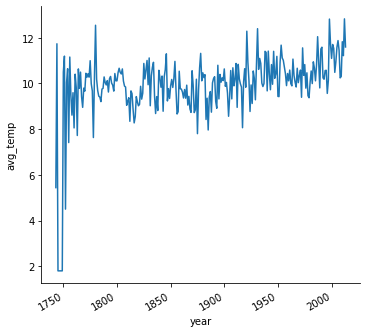

In [17]:
import seaborn as sns 
g = sns.relplot(x="year", y="avg_temp", kind="line", data=chicago_weather_fill)
g.fig.autofmt_xdate()


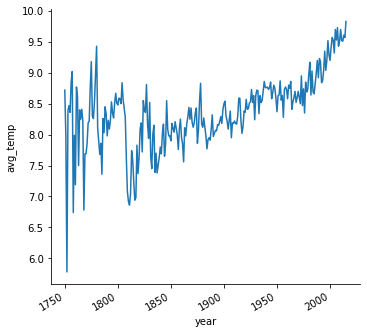

In [18]:

f = sns.relplot(x="year", y="avg_temp", kind="line", data=global_weather)
f.fig.autofmt_xdate()


# Calculate the Moving Average of Data and plot 

In [19]:
chicago_weather_fill[ '7day_rolling_avg' ] = chicago_weather_fill.avg_temp.rolling( 14).mean() 
chicago_weather_fill.head(15)

,city,country,avg_temp,year,7day_rolling_avg
15107,Chicago,United States,5.44,1743,NaN
15108,Chicago,United States,11.73,1744,NaN
15109,Chicago,United States,1.80,1745,NaN
15110,Chicago,United States,1.80,1746,NaN
15111,Chicago,United States,1.80,1747,NaN
15112,Chicago,United States,1.80,1748,NaN
15113,Chicago,United States,1.80,1749,NaN
15114,Chicago,United States,10.49,1750,NaN
15115,Chicago,United States,11.19,1751,NaN
15116,Chicago,United States,4.50,1752,NaN


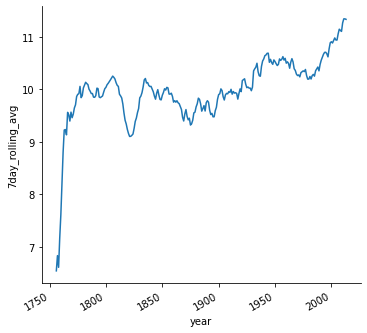

In [20]:
f = sns.relplot(x="year", y='7day_rolling_avg', kind="line", data=chicago_weather_fill)
f.fig.autofmt_xdate()


In [21]:
global_weather[ '7day_rolling_avg' ] = global_weather.avg_temp.rolling(7).mean() 


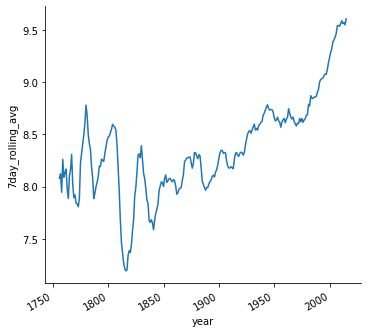

In [22]:
f = sns.relplot(x="year", y='7day_rolling_avg', kind="line", data=global_weather)
f.fig.autofmt_xdate()